**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


**Check data**

In [2]:
fdiry = file.path(
    FD_RES, 
    "results", 
    "region", 
    "annotation_enhancer_zscore_junke")
for(idn in dir(fdiry)){print(idn)}

[1] "description.tsv"
[1] "enhancer_zscore_junke.peak.ASTARR.bed.gz"
[1] "enhancer_zscore_junke.peak.LMPRA.bed.gz"
[1] "enhancer_zscore_junke.peak.TMPRA.bed.gz"
[1] "enhancer_zscore_junke.peak.WSTARR.bed.gz"


In [3]:
fdiry = file.path(
    FD_RES, 
    "results", 
    "region", 
    "KS91_K562_ASTARRseq_peak_macs_input", 
    "annotation_enhancer_zscore_junke")
for(idn in dir(fdiry)){print(idn)}

[1] "peak.annotation.enhancer_zscore_junke.peak.ASTARR.bed.gz"
[1] "peak.annotation.enhancer_zscore_junke.peak.LMPRA.bed.gz"
[1] "peak.annotation.enhancer_zscore_junke.peak.TMPRA.bed.gz"
[1] "peak.annotation.enhancer_zscore_junke.peak.WSTARR.bed.gz"
[1] "z_peak.annotation.enhancer_zscore_junke_peak_astarr.bed.gz"
[1] "z_peak.annotation.enhancer_zscore_junke_peak_wstarr.bed.gz"


## Import data

In [4]:
folder = "annotation_enhancer_zscore_junke"
fdiry  = file.path(FD_RES, "results", "region", folder)
fname = "description.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types = FALSE)

dat_cnames = dat
print(dim(dat))
dat

[1] 8 2


Name,Description
<chr>,<chr>
Chrom,Seqnames
Start,Start
End,End
Name,Name
Score,Z_score based on mean logFC
Strand,Strand
Assay_Type,Assay type
Assay_Label,Assay label


In [8]:
### init
annotation = "Enhancer_ZScore"
label      = "ASTARR"
cnames = dat_cnames$Name
cnames = c("Chrom_ATAC", "Start_ATAC", "End_ATAC", cnames, "Overlap")

###
fdiry = file.path(
    FD_RES, 
    "results", 
    "region", 
    "KS91_K562_ASTARRseq_peak_macs_input", 
    folder)
fname = "peak.annotation.enhancer_zscore_junke.peak.ASTARR.bed.gz"
fpath = file.path(fdiry, fname)

### read data
dat = read_tsv(fpath, col_names = cnames, show_col_types = FALSE)

### assign and show
dat_peak_annot_import = dat
print(dim(dat))
head(dat)

[1] 27535    12


Chrom_ATAC,Start_ATAC,End_ATAC,Chrom,Start,End,Name,Score,Strand,Assay_Type,Assay_Label,Overlap
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
chr1,136071,137429,chr1,136520,136950,peak1,-1.603468,.,ASTARR,ASTARR_R,430
chr1,136071,137429,chr1,137050,137150,peak2,-1.408464,.,ASTARR,ASTARR_R,100
chr1,180982,182087,chr1,181600,181790,peak3,-1.913155,.,ASTARR,ASTARR_R,190
chr1,777949,779437,chr1,778720,778830,peak1,2.009577,.,ASTARR,ASTARR_A,110
chr1,826754,828040,chr1,827060,827160,peak4,-1.383606,.,ASTARR,ASTARR_R,100
chr1,826754,828040,chr1,827590,828050,peak5,-2.477047,.,ASTARR,ASTARR_R,450


In [9]:
dat = dat_peak_annot_import
dat = dat %>% dplyr::mutate(
    Peak_ATAC  = paste0(Chrom_ATAC, ":", Start_ATAC, "-", End_ATAC),
    Annotation = annotation,
    Label      = label,
    Region     = paste0(Chrom, ":", Start, "-", End),
    Value      = Score,
    Note       = Assay_Label
)

dat_peak_annot_arrange = dat
print(dim(dat))
head(dat)

[1] 27535    18


Chrom_ATAC,Start_ATAC,End_ATAC,Chrom,Start,End,Name,Score,Strand,Assay_Type,Assay_Label,Overlap,Peak_ATAC,Annotation,Label,Region,Value,Note
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
chr1,136071,137429,chr1,136520,136950,peak1,-1.603468,.,ASTARR,ASTARR_R,430,chr1:136071-137429,Enhancer_ZScore,ASTARR,chr1:136520-136950,-1.603468,ASTARR_R
chr1,136071,137429,chr1,137050,137150,peak2,-1.408464,.,ASTARR,ASTARR_R,100,chr1:136071-137429,Enhancer_ZScore,ASTARR,chr1:137050-137150,-1.408464,ASTARR_R
chr1,180982,182087,chr1,181600,181790,peak3,-1.913155,.,ASTARR,ASTARR_R,190,chr1:180982-182087,Enhancer_ZScore,ASTARR,chr1:181600-181790,-1.913155,ASTARR_R
chr1,777949,779437,chr1,778720,778830,peak1,2.009577,.,ASTARR,ASTARR_A,110,chr1:777949-779437,Enhancer_ZScore,ASTARR,chr1:778720-778830,2.009577,ASTARR_A
chr1,826754,828040,chr1,827060,827160,peak4,-1.383606,.,ASTARR,ASTARR_R,100,chr1:826754-828040,Enhancer_ZScore,ASTARR,chr1:827060-827160,-1.383606,ASTARR_R
chr1,826754,828040,chr1,827590,828050,peak5,-2.477047,.,ASTARR,ASTARR_R,450,chr1:826754-828040,Enhancer_ZScore,ASTARR,chr1:827590-828050,-2.477047,ASTARR_R


In [32]:
dat = dat_peak_annot_arrange
dat = dat %>% dplyr::filter(Note != "ASTARR_AB")
dat = dat %>% 
    dplyr::group_by(Peak_ATAC, Annotation, Label) %>%
    dplyr::summarise(
        Count  = n(), 
        Region = paste(Region, collapse="|"),
        Score  = mean(Value),
        Note   = paste(unique(sort(Note)), collapse="|"),
        .groups = "drop")

### assign and show
dat_peak_annot_summary = dat
print(dim(dat))
head(dat)

[1] 17644     7


Peak_ATAC,Annotation,Label,Count,Region,Score,Note
<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>
chr10:100009096-100010466,Enhancer_ZScore,ASTARR,1,chr10:100009660-100010220,-2.111705,ASTARR_R
chr10:100185017-100187275,Enhancer_ZScore,ASTARR,1,chr10:100186900-100187010,-2.328370,ASTARR_R
chr10:100228452-100230090,Enhancer_ZScore,ASTARR,1,chr10:100229190-100229430,-3.287076,ASTARR_R
chr10:100346328-100347693,Enhancer_ZScore,ASTARR,1,chr10:100347430-100347550,-1.421908,ASTARR_R
chr10:100373060-100374238,Enhancer_ZScore,ASTARR,1,chr10:100374050-100374180,2.060838,ASTARR_A
chr10:100481467-100483191,Enhancer_ZScore,ASTARR,1,chr10:100482500-100482730,-1.576317,ASTARR_R


In [33]:
dat = dat_peak_annot_summary
table(dat$Count)


    1     2     3     4     5     6     7     8     9    11 
12718  3469  1006   316    91    30     8     4     1     1 

In [34]:
dat = dat_peak_annot_summary
table(dat$Note)


         ASTARR_A ASTARR_A|ASTARR_R          ASTARR_R 
             6273              1154             10217 

In [35]:
dat = dat_peak_annot_summary
dat = dat %>% dplyr::filter(Count == 8)
dat

Peak_ATAC,Annotation,Label,Count,Region,Score,Note
<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>
chr16:85610448-85614503,Enhancer_ZScore,ASTARR,8,chr16:85611300-85611440|chr16:85611650-85611990|chr16:85612120-85612220|chr16:85612580-85612800|chr16:85613110-85613230|chr16:85613360-85613690|chr16:85613700-85613800|chr16:85613810-85614250,-0.02689735,ASTARR_A|ASTARR_R
chr20:324198-327853,Enhancer_ZScore,ASTARR,8,chr20:324180-324280|chr20:325370-326120|chr20:326300-326570|chr20:326650-326760|chr20:326980-327080|chr20:327080-327190|chr20:327090-327210|chr20:327370-327470,-1.22079806,ASTARR_A|ASTARR_R
chr6:156776797-156780624,Enhancer_ZScore,ASTARR,8,chr6:156777130-156777270|chr6:156778020-156778170|chr6:156778020-156778310|chr6:156778200-156778330|chr6:156778820-156778920|chr6:156778930-156779040|chr6:156779070-156779440|chr6:156779510-156779800,-1.56755499,ASTARR_A|ASTARR_R
chr9:136847509-136850164,Enhancer_ZScore,ASTARR,8,chr9:136847510-136847650|chr9:136847780-136848020|chr9:136848460-136848770|chr9:136848850-136848990|chr9:136848860-136849020|chr9:136849030-136849220|chr9:136849570-136849770|chr9:136849920-136850050,-0.96609279,ASTARR_A|ASTARR_R


In [36]:
dat = dat_peak_annot_summary
dat = dat %>% dplyr::filter(Count == 11)
dat

Peak_ATAC,Annotation,Label,Count,Region,Score,Note
<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>
chr19:7868466-7872515,Enhancer_ZScore,ASTARR,11,chr19:7868690-7868940|chr19:7868980-7869080|chr19:7869100-7870250|chr19:7870360-7870560|chr19:7870600-7870710|chr19:7870690-7871060|chr19:7871070-7871170|chr19:7871500-7871650|chr19:7871700-7872040|chr19:7872070-7872230|chr19:7872240-7872410,-1.295076,ASTARR_A|ASTARR_R


In [41]:
dat = dat_peak_annot_summary
summary(dat$Score)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-8.2220 -1.9924 -1.5277 -0.3758  2.0715  4.0337 

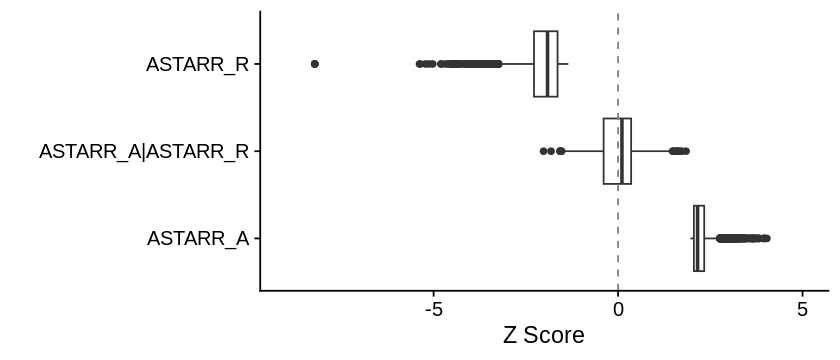

In [50]:
dat = dat_peak_annot_summary
gpt = ggplot(dat, aes(x=Note, y=Score)) + 
    geom_boxplot() + 
    geom_hline(yintercept = 0, linetype="dashed", color="grey50") +
    ylim(-9, 5) +
    labs(x="", y="Z Score") +
    coord_flip() +
    theme_cowplot()

options(repr.plot.height=3, repr.plot.width=7)
print(gpt)